* Amir Esmaeili, 50225893, s77aesma@uni-bonn.de
* Kiavash Jamshidi, 50151853, s19kjams@uni-bonn.de

### Project Setup
Installation Instructions
Follow these steps to set up the environment and install the required dependencies.

### Step 1: Install Dependencies
First, make sure you have all the necessary packages installed. Run the following command to install the dependencies listed in requirements.txt:


In [38]:
!pip install spacy && pip install pandas && pip install seaborn


### Step 2: Download SpaCy Language Model
Next, download the English language model for SpaCy, which is required for natural language processing tasks such as tokenization and lemmatization. You can do this with the following command:

In [39]:
!python -m spacy download en_core_web_sm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 7.9 MB/s eta 0:00:00a 0:00:01
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


### Task 1 (2 points)
This function, extract_proper_nouns, takes a file name as input, reads its content,
and returns a list of multi-word proper nouns found in the text.
It uses scikit-learn's CountVectorizer to split the text into tokens (words).
The function then identifies sequences of words that start with an uppercase letter,
considering them as proper nouns if they contain more than one consecutive word.
Finally, it returns a list of these multi-word proper nouns.


In [33]:
from sklearn.feature_extraction.text import CountVectorizer

def extract_proper_nouns(my_file_name):
    several_token_propn = []
    
    with open(my_file_name, 'r') as file:
        text = file.read()
    
    vectorizer = CountVectorizer().build_tokenizer()
    tokens = vectorizer(text)
    
    current_propn = []
    for word in tokens:
        if word[0].isupper():
            current_propn.append(word)
        else:
            if len(current_propn) > 1:
                several_token_propn.append(" ".join(current_propn))
            current_propn = []
    
    if len(current_propn) > 1:
        several_token_propn.append(" ".join(current_propn))
    
    return several_token_propn

extract_proper_nouns("test.txt")


[]

### Task 2

# Common Lemma Extraction Function

This notebook defines a function `common_lemma(my_file_name)` that processes a text file and returns a dictionary where:
- **Key**: The lemma (root form) of the word.
- **Value**: A list of words that share the same lemma and are either nouns or verbs.

### Function Workflow:
1. The function reads the input file and processes its content using the **spaCy** library.
2. It tokenizes the text and checks if each token is either a **noun** or a **verb**.
3. For each noun/verb, the function retrieves the lemma and groups the words that share the same lemma.
4. It only includes lemmas that appear both as nouns and verbs in the text.


In [34]:
import spacy

nlp = spacy.load("en_core_web_sm")

def common_lemma(my_file_name):
    tokens_with_common_lemma = {}

    with open(my_file_name, 'r') as file:
        text = file.read()
    doc = nlp(text)
    for token in doc:
        if token.pos_ in {"NOUN", "VERB"}:
            lemma = token.lemma_
            
            if lemma not in tokens_with_common_lemma:
                tokens_with_common_lemma[lemma] = []
            
            if token.text not in tokens_with_common_lemma[lemma]:
                tokens_with_common_lemma[lemma].append(token.text)
    
    tokens_with_common_lemma = {lemma: words for lemma, words in tokens_with_common_lemma.items() 
                                if len(words) > 1}
    
    return tokens_with_common_lemma
common_lemma("test.txt")

{'show': ['show', 'showing', 'showed']}

### Task 3

### BBC News Dataset Loading

This notebook demonstrates how to load and inspect the **BBC News dataset** using the **pandas** library.

### Steps:
1. The function loads the **`bbc-news.csv`** file into a **pandas DataFrame**.
2. The first few rows of the dataset are displayed using `head()`, allowing us to preview the structure and content of the data.


In [35]:
import pandas as pd

file_path = 'bbc-news.csv' 
bbc_data = pd.read_csv(file_path)

print(bbc_data.head())

        category                                               text
0           tech  tv future in the hands of viewers with home th...
1       business  worldcom boss  left books alone  former worldc...
2          sport  tigers wary of farrell  gamble  leicester say ...
3          sport  yeading face newcastle in fa cup premiership s...
4  entertainment  ocean s twelve raids box office ocean s twelve...


### Task 4

/var/folders/cp/2tfnzp6s7p96w259mtl0_sn80000gn/T/ipykernel_278/2075024008.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=category_counts.index, y=category_counts.values, palette='Set2')


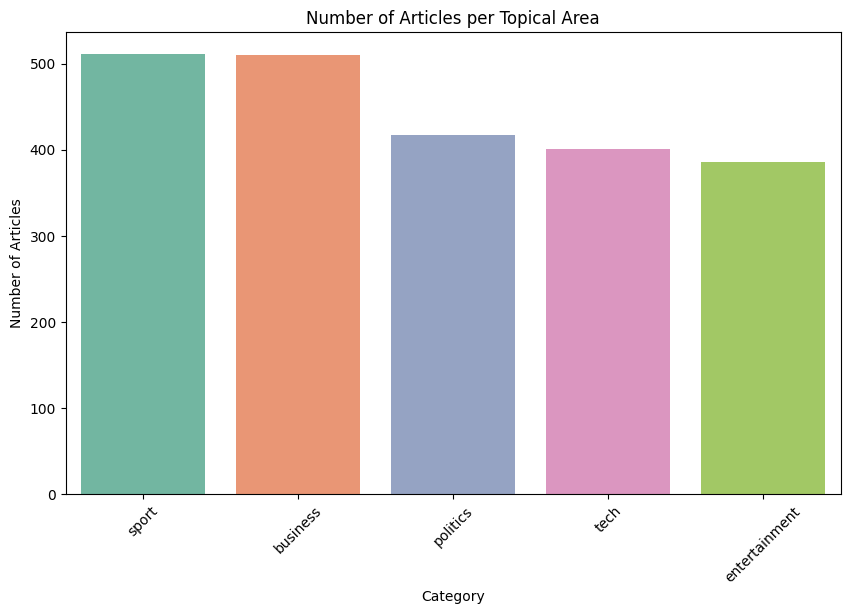

In [36]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

file_path = 'bbc-news.csv'
bbc_data = pd.read_csv(file_path)

category_counts = bbc_data['category'].value_counts()

plt.figure(figsize=(10, 6))
sns.barplot(x=category_counts.index, y=category_counts.values, palette='Set2')
plt.title('Number of Articles per Topical Area')
plt.xlabel('Category')
plt.ylabel('Number of Articles')
plt.xticks(rotation=45)
plt.show()
